# Sortieralgorithmen

Ich habe mich neulich gefragt, was es für gängige Sortieralgorithmen gibt. Wie funktionieren sie? Wie schnell sind sie? Gibt es koriose Algorithmen usw.
Was ich dabei gelernt habe, möchte ich hier teilen. Ich werde verschiedene Algorithmen in Python umsetzen und versuchen den Vorgang grafisch darszustellen.
Dazu brauche ich zunächst einen Datensatz.

## Der zu sortierende Datensatz

Es wird ein einfacher Datensatz sein, den man hoffentlich gut visualisieren kann. Und zwar eine gewisse Anzahl von Integerwerten, die jedes Mal gleich randomisiert sein sollten.

In [41]:
# Zunächst werden alle benötigten Bibliotheken importiert
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm
import os
import time

In [42]:
# Anzahl der ELemente im Datensatz
n = 250

# Random Seed setzen
random.seed(42)

# Datensatz generieren
dataset = random.sample(range(1, n+1), n)

Dann definieren eine Funktion die wir noch häufiger einsetzen werden, um das Sortieren zu visualisieren.

In [43]:
# Farbverlaufsfunktion
cmap = cm.get_cmap('YlGnBu')  # Farbverlauf von Gelb über Grün zu Blau

# Funktion zum Aktualisieren des Balkendiagramms
def update_chart(data, iteration, folder_name, name = "Dataset"):
    i = len(data)
    colors = [cmap(x/i) for x in data]
    plt.bar(range(i), data, color=colors)
    plt.xlabel('Index')
    plt.ylabel('Wert')
    if not os.path.exists(folder_name):
      os.makedirs(folder_name)
    if name != "Dataset":
      plt.title(f'Sortierung {nama} - Schritt {iteration}')
      plt.savefig(f'{folder_name}/{name}_Iteration_{iteration:02d}.png')  # Speichere den Plot als PNG-Datei
    else:
      plt.title(f'Zugrunde liegender Datensatz')
      plt.savefig(f'{folder_name}/{name}.png')  # Speichere den Plot als PNG-Datei
    plt.close()

C:\Users\gutsc\AppData\Local\Temp\ipykernel_20888\1255667086.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlGnBu')  # Farbverlauf von Gelb über Grün zu Blau


In [44]:
update_chart(dataset, 1, "Sortieralgorithmen")

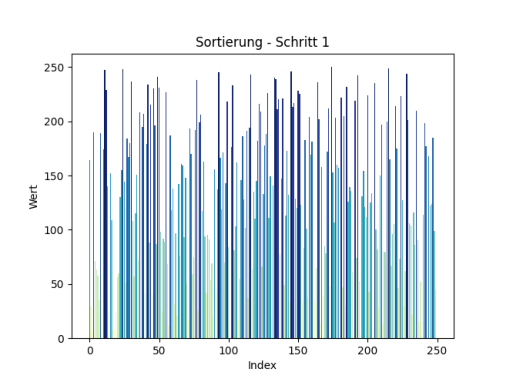

In [45]:

# Load the image
image = plt.imread('Sortieralgorithmen/dataset.png')

# Show the image
plt.imshow(image)
plt.axis('off')
plt.show()

## Sortieralgorithmen

### Bubble Sort

**Bubble Sort**: Der Bubble Sort Algorithmus vergleicht zunächst das erste Element mit dem nächsten Element und tauscht sie bei Bedarf aus, wenn sie in der falschen Reihenfolge sind. Anschließend vergleicht er das zweite Element mit dem darauffolgenden Element und tauscht sie gegebenenfalls aus. Dieser Vorgang wird fortgesetzt, bis das vorletzte Element mit dem letzten Element verglichen wurde.

Der Algorithmus arbeitet sich in jedem Durchlauf von links nach rechts durch die Liste und tauscht benachbarte Elemente, wenn sie in der falschen Reihenfolge sind. Nach jedem Durchlauf wird das größte Element in der Liste an die richtige Position am Ende verschoben. Dieser Prozess wird so lange wiederholt, bis die gesamte Liste sortiert ist.

Der Name "Bubble Sort" kommt von der Art und Weise, wie die größten Elemente allmählich an das Ende der Liste "aufsteigen", ähnlich wie Luftblasen in Wasser aufsteigen.

In [46]:
# Bubble Sort Algorithmus
def bubble_sort(data):
    sorted_datasets = []
    for i in range(len(data)-1):
        for j in range(len(data)-1-i):
            # Vergleiche benachbarte Elemente und tausche sie, falls sie in der falschen Reihenfolge sind
            if data[j] > data[j+1]:
                data[j], data[j+1] = data[j+1], data[j]
        # Speichere den sortierten Datensatz nach jedem Sortierschritt
        sorted_datasets.append(data.copy())
    return sorted_datasets